##### importing the liberaries

In [363]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import LabelEncoder

from  sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from scipy.stats import zscore

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import  XGBRegressor
from sklearn.svm import SVR

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")




###### importing data 

In [364]:
# loading tha dataqset from csv file to pandas dataFrame
big_mart_data=pd.read_csv("BigMartData.csv")

In [365]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [366]:
#number of data poins and number of features
big_mart_data.shape

(8523, 12)

In [367]:
#getting information about datadet
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [368]:
#checking missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###### Handling missing values

In [369]:
#mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184136183

In [370]:
# filling the missing values in "Item_Weight" column with "mean" value
big_mart_data["Item_Weight"].fillna(big_mart_data['Item_Weight'].mean(),inplace= True)

In [371]:
#checking missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [372]:
#Replacing the missing values in "Outlet_Size" with "mode"
mode_of_outlet_size = big_mart_data.pivot_table(values="Outlet_Size",columns = "Outlet_Type", aggfunc=(lambda x: x.mode()[0]))

In [373]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [374]:
missing_values=big_mart_data['Outlet_Size'].isnull()

In [375]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [376]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [377]:
big_mart_data['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [378]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###### data Analysis

In [379]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [380]:
#statistical information about data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [381]:
sns.set()

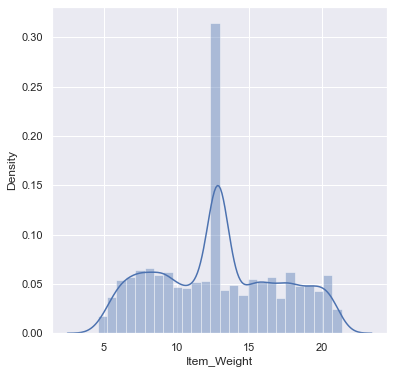

In [382]:
#Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

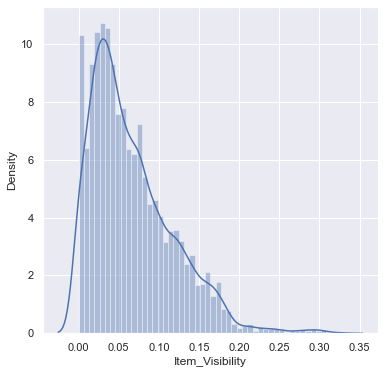

In [383]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

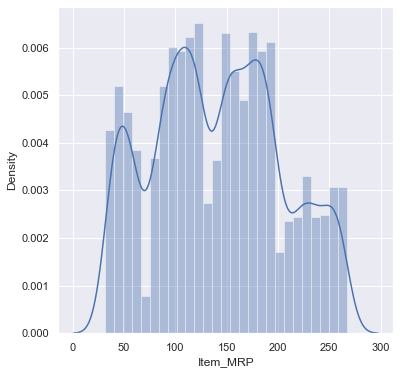

In [384]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()


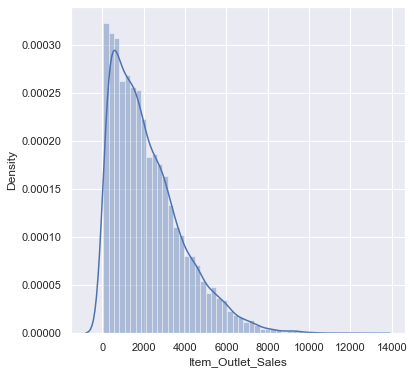

In [385]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()


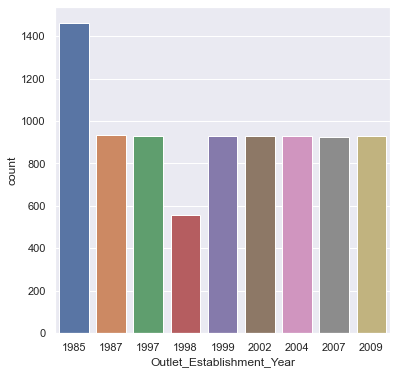

In [386]:
#Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data= big_mart_data)
plt.show()

###### Categorical features

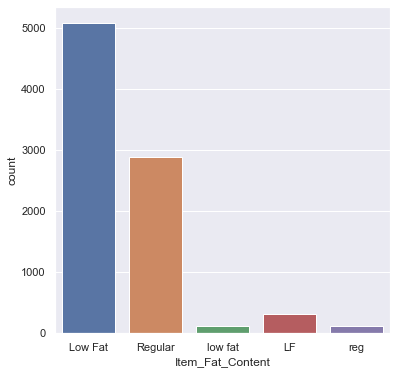

In [387]:
#Item_Fat_Content distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data= big_mart_data)
plt.show()

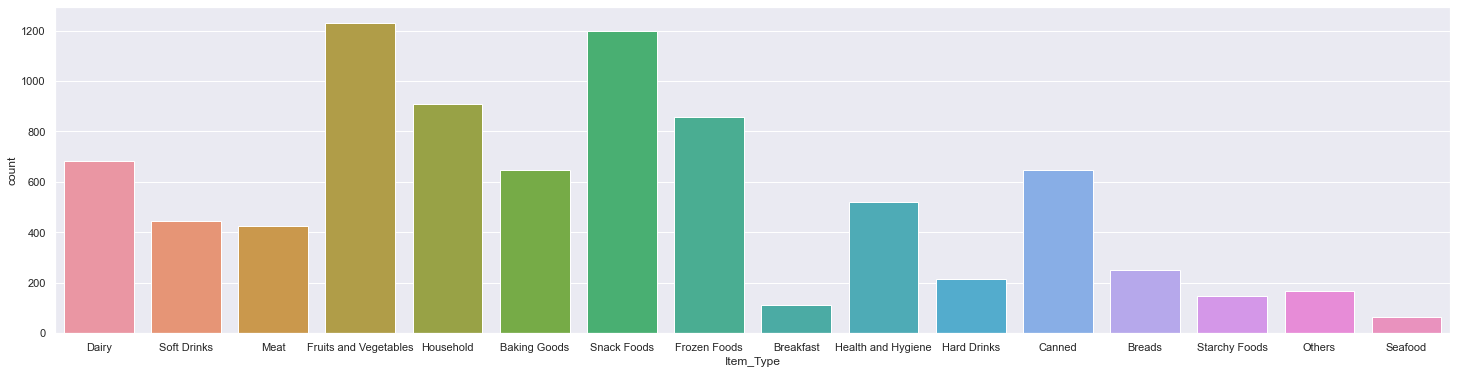

In [388]:
#Item_Type distribution
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type',data= big_mart_data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

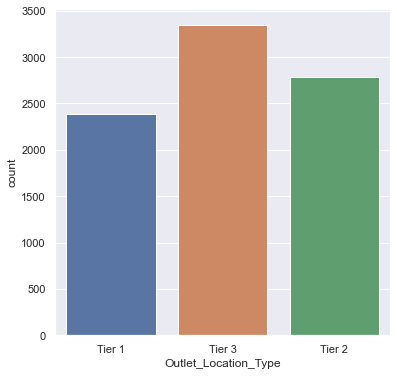

In [389]:
#Outlet_Location_Type distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data= big_mart_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

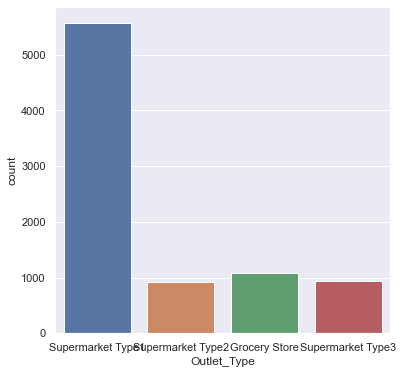

In [390]:
#Outlet_Type distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type',data= big_mart_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

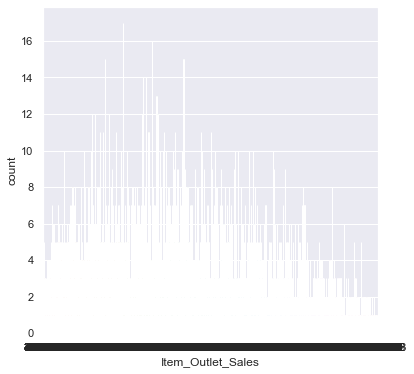

In [391]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Outlet_Sales',data= big_mart_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

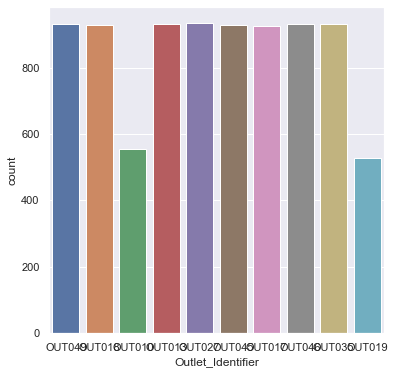

In [392]:
#Outlet_Identifier distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Identifier',data= big_mart_data)
plt.show

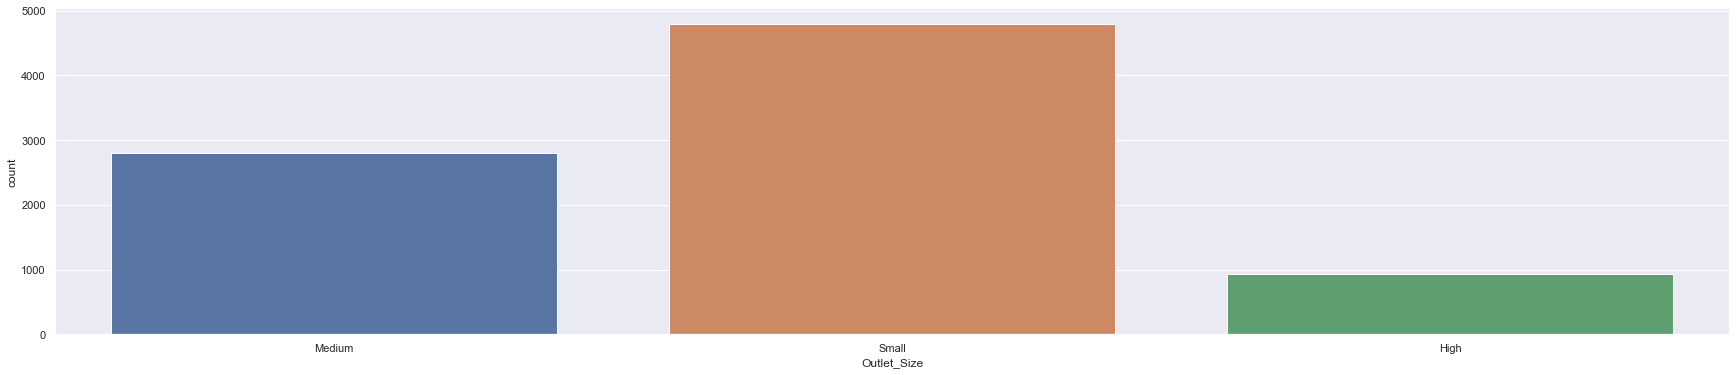

In [393]:
#Outlet_Size distribution
plt.figure(figsize=(30,6))
sns.countplot(x ='Outlet_Size',data = big_mart_data)
plt.show()

In [394]:
big_mart_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [395]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [396]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low fat','LF':'Low fat','reg':'Regular'}},inplace= True)

In [397]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    3006
Low fat     428
Name: Item_Fat_Content, dtype: int64

##### Label Encoding

In [398]:
encoder= LabelEncoder()

In [399]:
big_mart_data["Item_Identifier"]=encoder.fit_transform(big_mart_data['Item_Identifier'])

In [400]:
big_mart_data["Item_Fat_Content"]=encoder.fit_transform(big_mart_data['Item_Fat_Content'])

In [401]:
big_mart_data["Item_Type"]=encoder.fit_transform(big_mart_data['Item_Type'])

In [402]:
big_mart_data["Outlet_Identifier"]=encoder.fit_transform(big_mart_data['Outlet_Identifier'])

In [403]:
big_mart_data["Outlet_Type"]=encoder.fit_transform(big_mart_data['Outlet_Type'])

In [404]:
big_mart_data["Outlet_Location_Type"]=encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

In [405]:
big_mart_data["Outlet_Size"]=encoder.fit_transform(big_mart_data['Outlet_Size'])

In [406]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


###### Finding Correaltion

In [408]:
corr_mat=big_mart_data.corr()
corr_mat

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.111803,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001229,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.022573,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.014105,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.111803,-0.022573,1.000000,0.048079,-0.135594,0.003313,-0.003397,0.000442,-0.002214,0.001700,0.003145,0.015716
Item_Visibility,-0.025482,-0.012049,0.048079,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.094025,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.135594,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.000218,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.003313,-0.001315,0.032651,1.000000,0.003319,0.005020,0.000872,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.003397,-0.100439,0.001656,0.003319,1.000000,0.079035,0.260272,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.000442,-0.074834,0.004970,0.005020,0.079035,1.000000,0.425534,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001229,-0.014105,-0.002214,0.094025,-0.000218,0.000872,0.260272,0.425534,1.000000,-0.480075,-0.401373,-0.162753
Outlet_Location_Type,0.003656,0.004088,0.001700,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.480075,1.000000,0.467219,0.089367


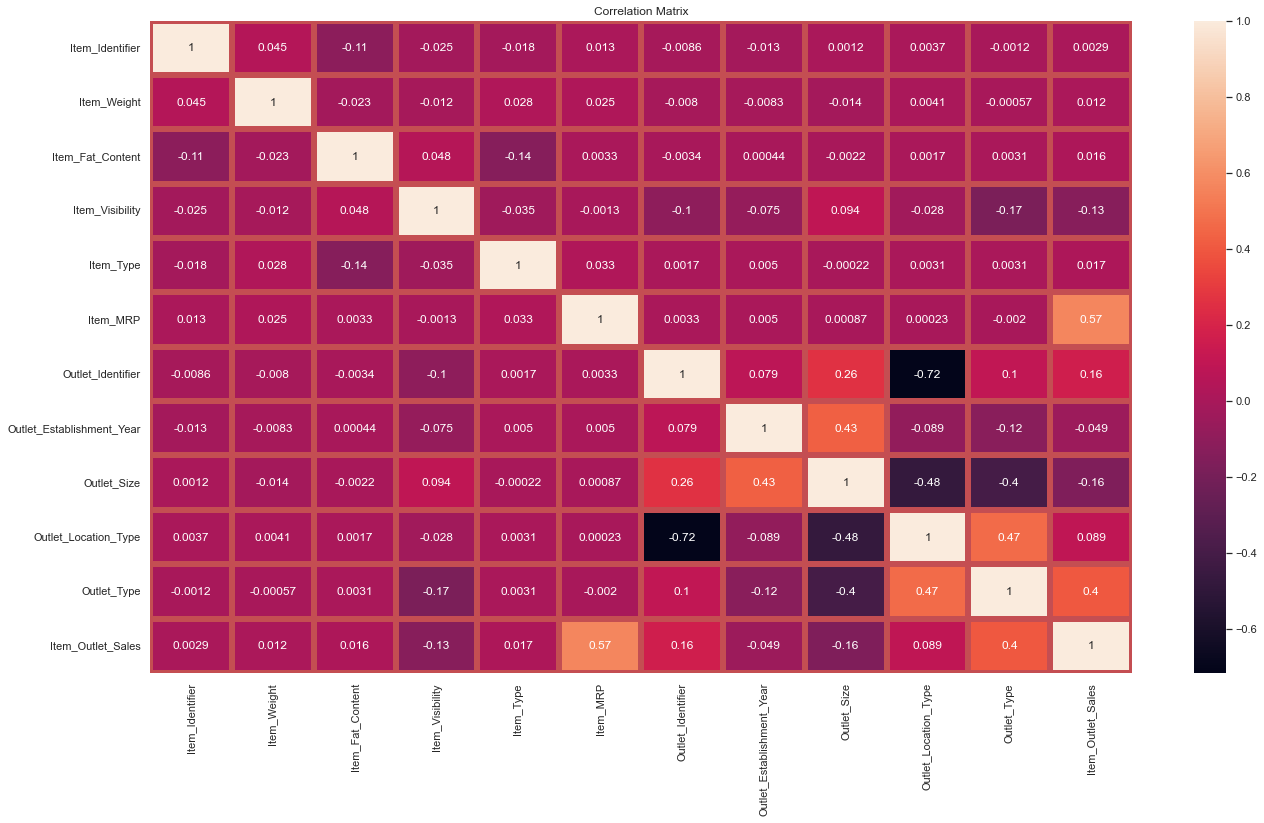

In [409]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True,linewidths=6,linecolor='r')
plt.title("Correlation Matrix")
plt.show()

In [410]:
corr_mat["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Type                    0.017048
Item_Fat_Content             0.015716
Item_Weight                  0.011550
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Outlet_Size                 -0.162753
Name: Item_Outlet_Sales, dtype: float64

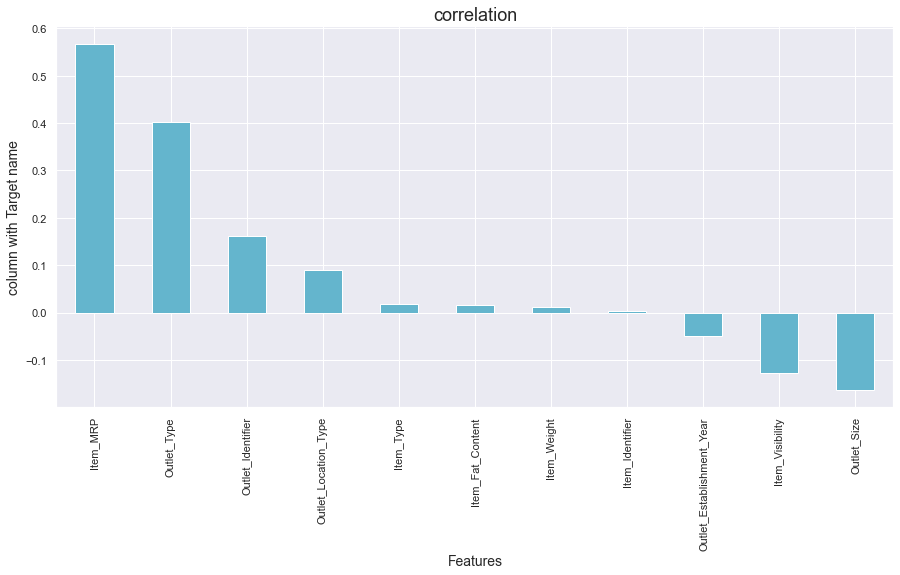

In [411]:
plt.figure(figsize=[15,7])
big_mart_data.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with Target name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

#### Features and Label Seperation

In [412]:
X=big_mart_data.drop(columns="Item_Outlet_Sales",axis = 1)
Y=big_mart_data["Item_Outlet_Sales"]


In [413]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [414]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [415]:
#check the skewness
X.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.503579
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.861866
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
dtype: float64

In [416]:
#Removing skewness throgh power _transform
from sklearn.preprocessing import power_transform
skewed = power_transform(X)

skewed=pd.DataFrame(skewed,columns=X.columns)
skewed.skew()


Item_Identifier             -0.293700
Item_Weight                 -0.068024
Item_Fat_Content             0.422634
Item_Visibility              0.124279
Item_Type                   -0.164574
Item_MRP                    -0.115386
Outlet_Identifier           -0.213935
Outlet_Establishment_Year   -0.200959
Outlet_Size                 -0.463435
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
dtype: float64

Now all columns skewness is within range of -0.5 to 0.5

In [417]:
big_mart_data=skewed
X=skewed

### Outlier Detection

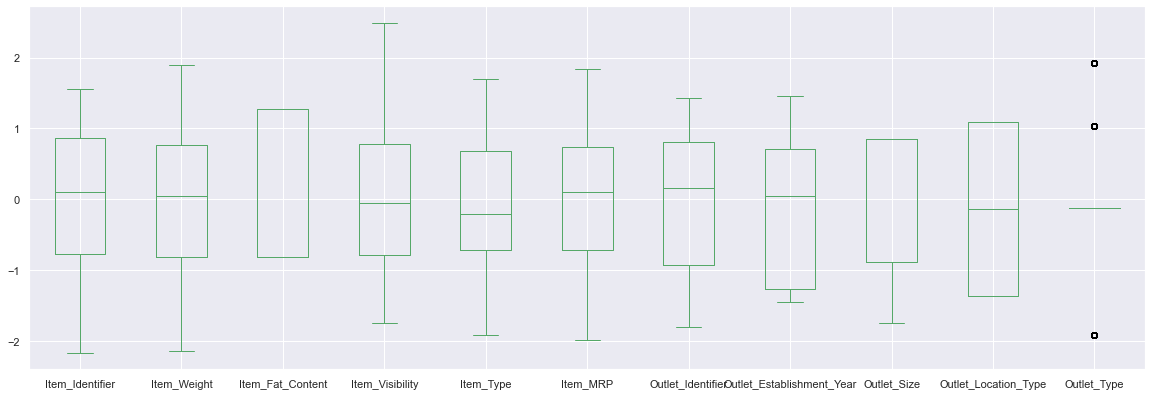

In [418]:
X.boxplot(figsize=[20,8],color='g')
plt.subplots_adjust(bottom=0.25)
plt.show()


<AxesSubplot:>

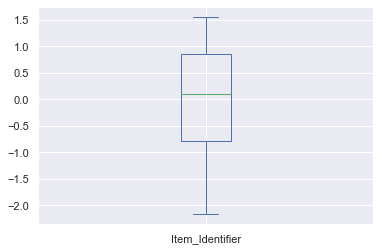

In [419]:
big_mart_data["Item_Identifier"].plot.box()

<AxesSubplot:>

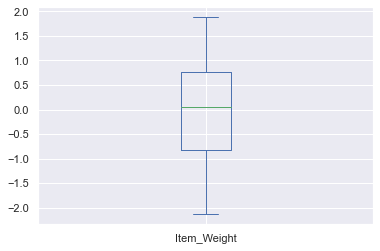

In [420]:
big_mart_data["Item_Weight"].plot.box()

<AxesSubplot:>

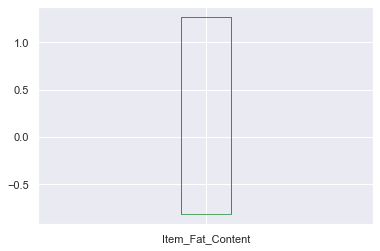

In [421]:
big_mart_data["Item_Fat_Content"].plot.box()

<AxesSubplot:>

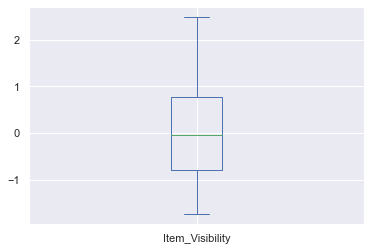

In [422]:
big_mart_data["Item_Visibility"].plot.box()

<AxesSubplot:>

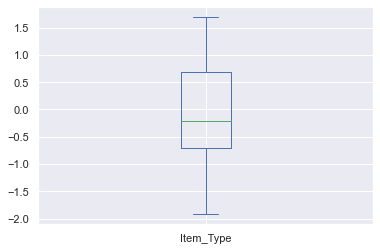

In [423]:
big_mart_data["Item_Type"].plot.box()

<AxesSubplot:>

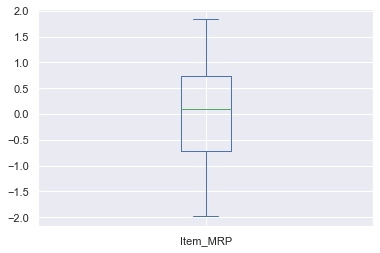

In [424]:
big_mart_data["Item_MRP"].plot.box()

There is no any Outliers

#### Data standarisation

In [425]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.46103862, -0.82263635, -0.81736583, ..., -0.88066723,
        -1.37384276, -0.12348771],
       [-2.09385818, -1.73380133,  1.27053446, ..., -0.88066723,
         1.08832445,  1.04059102],
       [-0.15401841,  1.08636176, -0.81736583, ..., -0.88066723,
        -1.37384276, -0.12348771],
       ...,
       [ 1.20607271, -0.49655592, -0.81736583, ...,  0.85318121,
        -0.13111325, -0.12348771],
       [-0.11255898, -1.37344321,  1.27053446, ..., -0.88066723,
         1.08832445,  1.04059102],
       [-1.86245653,  0.49178563, -0.81736583, ...,  0.85318121,
        -1.37384276, -0.12348771]])

##### Splitting tha Data into Training data and Testing Data

In [426]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [427]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


##### Training data on Machine learning mode


#### XGBoost Regressor

In [433]:
regressor= XGBRegressor()
regressor.fit(X_train,Y_train)
pred_xgb =regressor.predict(X_test)
print(r2_score(Y_test,pred_xgb))

0.5348928627144965


In [434]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(regressor,X,Y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())


Cross validation score for Linear Regression Model is  0.5215645573994359


XGBoost Regressor model difference is  53.48- 52.15= 1.33


#### Linear reression Model

In [435]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression()
lr.fit(X_train,Y_train)
predlr = lr.predict(X_test)
print(r2_score(Y_test,predlr))


0.5076260401549479


In [436]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X,Y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())


Cross validation score for Linear Regression Model is  0.5199779826324704


Linear Regression Model difference is 50.76 - 51.99= -0.23

#### RidgeRegressor Model

In [437]:
from sklearn.linear_model import Ridge
r = Ridge()
r.fit(X_train,Y_train)
predr = r.predict(X_test)
print(r2_score(Y_test,predr))



0.5076260734475593


In [438]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(r,X,Y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())

Cross validation score for Linear Regression Model is  0.5199783892161036


Ridge Regression Model difference is 50.76 - 51.99= -0.23

#### RandomForest Regression


In [439]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
predrf = rf.predict(X_test)
print(r2_score(Y_test,predrf))

0.553007279979236


In [440]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf,X,Y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())


Cross validation score for Linear Regression Model is  0.5483838989752553


RandomForestRegression Model difference is  55.30 - 54.83 = 0.47

#### Hyper Parameter tuning

In [445]:
parameters1 = {'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
             'random_state': [200, 700, 900],
             'max_iter': [200, 900],
             'selection': ['cyclic','random']}
GCV=GridSearchCV(Ridge(),parameters1,cv=5)
GCV.fit(X_train,Y_train)

ValueError: Invalid parameter selection for estimator Ridge(alpha=4.0, max_iter=200, random_state=200). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
GCV.best_params_

#### Obtaining the Best Parameters for Hyper parameters tuning